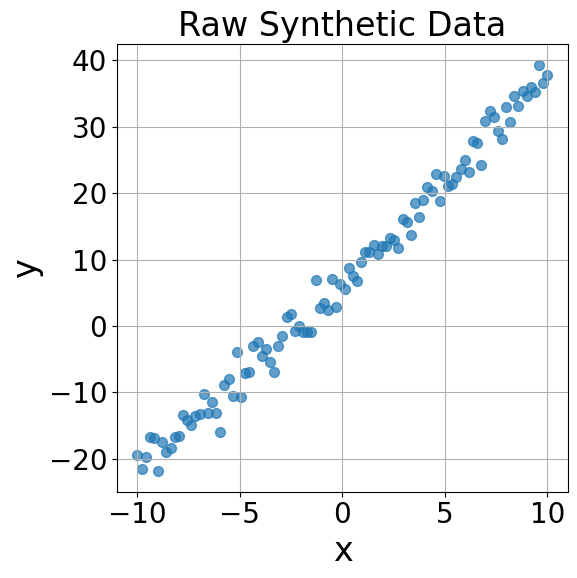

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)
np.random.seed(0)

# -------------------------------
# Generate Synthetic Data
# -------------------------------
# Create a simple linear relation: y = 3*x + 7 + noise.
N = 100
x = np.linspace(-10, 10, N).reshape(-1, 1)
noise = np.random.normal(0, 2, size=(N, 1))
y = 3 * x + 7 + noise

# Convert data to torch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()


# -------------------------------
# Display the Raw Data
# -------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=50, alpha=0.7)
plt.title('Raw Synthetic Data', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

# NN Module Utils

In [ ]:
# -------------------------------
# Define a Simple Linear Model
# -------------------------------
def get_model():
    # One linear layer: input_dim=1, output_dim=1.
    model = torch.nn.Linear(1, 1)
    with torch.no_grad():
        model.weight.fill_(0.0)
        model.bias.fill_(0.0)
    return model

# -------------------------------
# Training Function
# -------------------------------
def train_model(model, optimizer, x_tensor, y_tensor, epochs,
                use_minibatch=False, batch_size=10):
    criterion = torch.nn.MSELoss()
    losses = []

    if use_minibatch:
        # Create dataset and DataLoader for mini-batch updates.
        dataset = TensorDataset(x_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        for epoch in range(epochs):
            for xb, yb in dataloader:
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()
            # Evaluate loss on the full dataset after each epoch.
            with torch.no_grad():
                preds_full = model(x_tensor)
                full_loss = criterion(preds_full, y_tensor)
            losses.append(full_loss.item())
    else:
        # Full-batch update.
        for epoch in range(epochs):
            optimizer.zero_grad()
            preds = model(x_tensor)
            loss = criterion(preds, y_tensor)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

    return losses

In [ ]:
def run_one_setup(epochs):
  errors = {}

  # -------------------------------
  # 1. Gradient Descent (GD) - Full Batch
  # -------------------------------
  model = get_model()
  optimizer_gd = torch.optim.SGD(model.parameters(), lr=0.001)  # full batch
  errors['Gradient Descent'] = train_model(model, optimizer_gd, x_tensor, y_tensor, epochs, use_minibatch=False)

  # -------------------------------
  # 2. Stochastic Gradient Descent (SGD) - Mini-batches
  # -------------------------------
  model = get_model()
  optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.001)  # using mini-batches
  errors['Stochastic Gradient Descent'] = train_model(model, optimizer_sgd, x_tensor, y_tensor, epochs, use_minibatch=True, batch_size=10)

  # -------------------------------
  # 3. AdaGrad
  # -------------------------------
  model = get_model()
  optimizer_adagrad = torch.optim.Adagrad(model.parameters(), lr=0.1)
  errors['AdaGrad'] = train_model(model, optimizer_adagrad, x_tensor, y_tensor, epochs, use_minibatch=False)

  # -------------------------------
  # 4. RMSProp
  # -------------------------------
  model = get_model()
  optimizer_rmsprop = torch.optim.RMSprop(model.parameters(), lr=0.01)
  errors['RMSProp'] = train_model(model, optimizer_rmsprop, x_tensor, y_tensor, epochs, use_minibatch=False)

  # -------------------------------
  # 5. SGD with Momentum
  # -------------------------------
  model = get_model()
  optimizer_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  errors['Momentum'] = train_model(model, optimizer_momentum, x_tensor, y_tensor, epochs, use_minibatch=False)

  # -------------------------------
  # 6. Nesterov Accelerated Gradient
  # -------------------------------
  model = get_model()
  optimizer_nesterov = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
  errors['Nesterov AG'] = train_model(model, optimizer_nesterov, x_tensor, y_tensor, epochs, use_minibatch=False)

  # -------------------------------
  # 7. Adam
  # -------------------------------
  model = get_model()
  optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.01)
  errors['Adam'] = train_model(model, optimizer_adam, x_tensor, y_tensor, epochs, use_minibatch=False)

  return errors

# 100 Epoch View

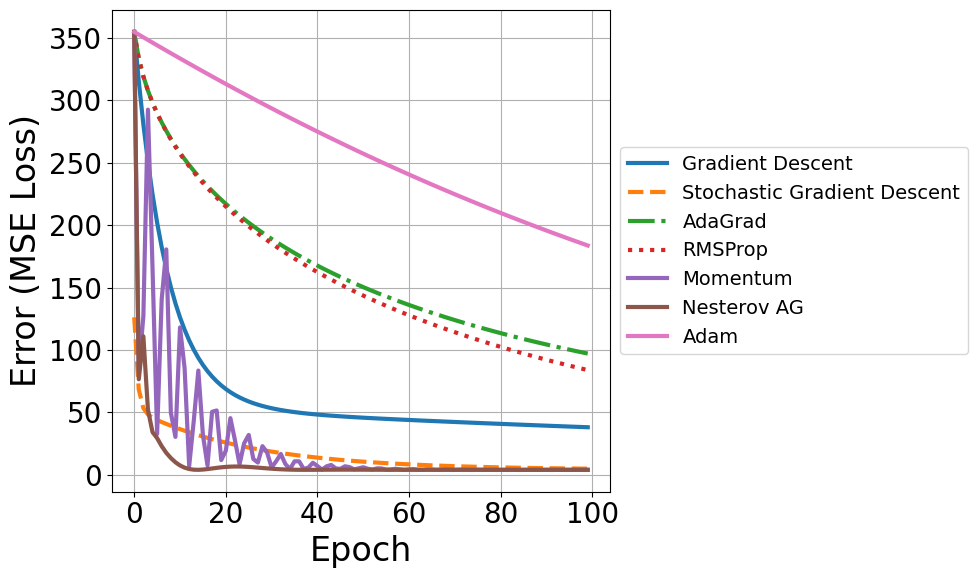

In [ ]:
# -------------------------------
# Set Training Parameters
# -------------------------------
epochs = 100  # Number of training epochs
errors = run_one_setup(epochs)

# -------------------------------
# Plotting the Errors vs Epochs
# -------------------------------
plt.figure(figsize=(10, 6))
epochs_range = np.arange(epochs)

plt.plot(epochs_range, errors['Gradient Descent'], label='Gradient Descent', linewidth=3)
plt.plot(epochs_range, errors['Stochastic Gradient Descent'], label='Stochastic Gradient Descent', linestyle='--', linewidth=3)
plt.plot(epochs_range, errors['AdaGrad'], label='AdaGrad', linestyle='-.', linewidth=3)
plt.plot(epochs_range, errors['RMSProp'], label='RMSProp', linestyle=':', linewidth=3)
plt.plot(epochs_range, errors['Momentum'], label='Momentum', linewidth=3)
plt.plot(epochs_range, errors['Nesterov AG'], label='Nesterov AG', linewidth=3)
plt.plot(epochs_range, errors['Adam'], label='Adam', linewidth=3)

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Error (MSE Loss)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


# 500 Epoch View

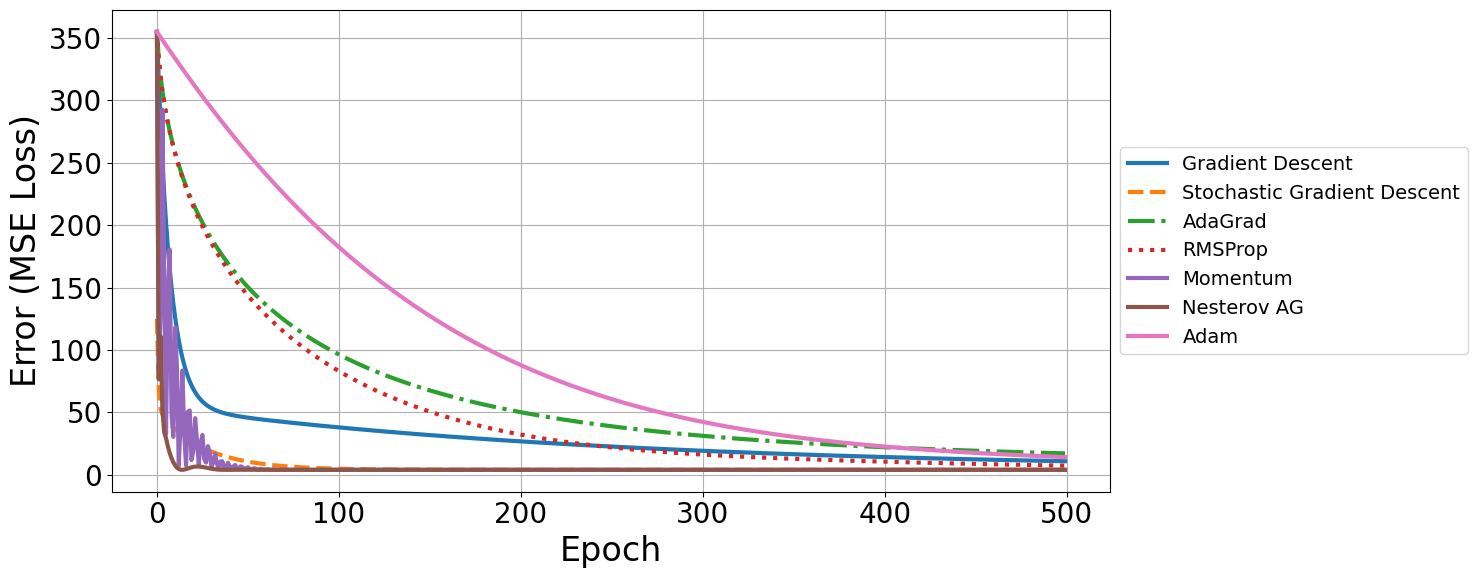

In [ ]:
# -------------------------------
# Set Training Parameters
# -------------------------------
epochs = 500  # Number of training epochs
errors = run_one_setup(epochs)

# -------------------------------
# Plotting the Errors vs Epochs
# -------------------------------
plt.figure(figsize=(15, 6))
epochs_range = np.arange(epochs)

plt.plot(epochs_range, errors['Gradient Descent'], label='Gradient Descent', linewidth=3)
plt.plot(epochs_range, errors['Stochastic Gradient Descent'], label='Stochastic Gradient Descent', linestyle='--', linewidth=3)
plt.plot(epochs_range, errors['AdaGrad'], label='AdaGrad', linestyle='-.', linewidth=3)
plt.plot(epochs_range, errors['RMSProp'], label='RMSProp', linestyle=':', linewidth=3)
plt.plot(epochs_range, errors['Momentum'], label='Momentum', linewidth=3)
plt.plot(epochs_range, errors['Nesterov AG'], label='Nesterov AG', linewidth=3)
plt.plot(epochs_range, errors['Adam'], label='Adam', linewidth=3)

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Error (MSE Loss)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


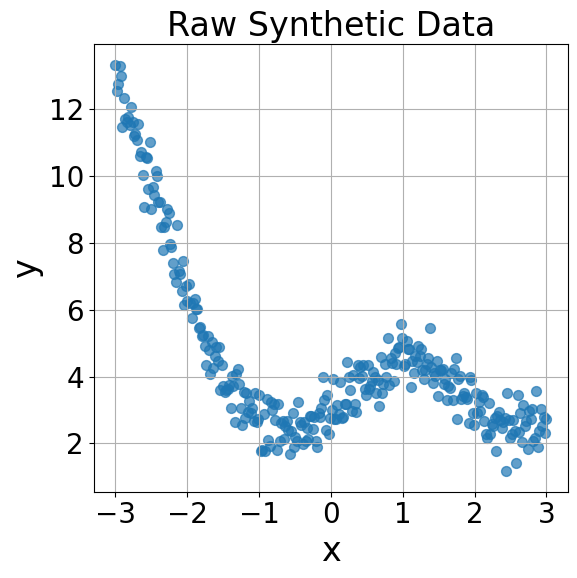

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# -------------------------------------------------
# Generate More Complicated Synthetic Data
# -------------------------------------------------
# Here we create a non-linear function:
#     y = 2*sin(1.5*x) + 0.5*x^2 - x + 3 + noise
N = 300
x = np.linspace(-3, 3, N).reshape(-1, 1)
noise = np.random.normal(0, 0.5, size=(N, 1))
y = 2 * np.sin(1.5 * x) + 0.5 * (x**2) - x + 3 + noise

# Convert data to torch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()


# -------------------------------
# Display the Raw Data
# -------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=50, alpha=0.7)
plt.title('Raw Synthetic Data', fontsize=24)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

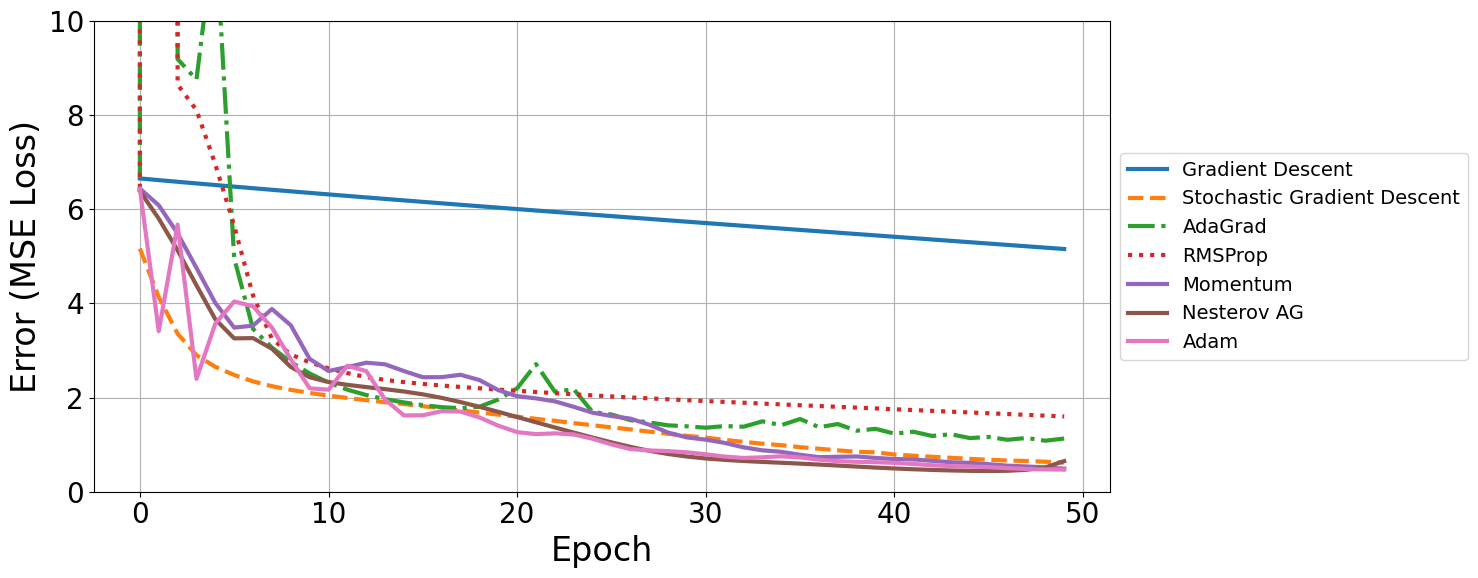

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# -------------------------------------------------
# Generate Synthetic 5-Dimensional Data
# -------------------------------------------------
# Create 300 samples where each sample has 5 features.
# The target function is defined as:
#   y = sin(x0) + 0.5 * (x1)^2 - 0.3*x2 + 0.1*(x3)^3 - cos(x4) + noise
N = 300
D = 5
x = np.random.uniform(-3, 3, (N, D))

# Generate noise
noise = np.random.normal(0, 0.5, (N, 1))

# Compute target using various non-linear functions of the input features
y = (np.sin(x[:, 0:1])
     + 0.5 * (x[:, 1:2] ** 2)
     - 0.3 * x[:, 2:3]
     + 0.1 * (x[:, 3:4] ** 3)
     - np.cos(x[:, 4:5])
     + noise)

# Convert data to torch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# -------------------------------------------------
# Define a Two-Layer Neural Network Model
# -------------------------------------------------
model = torch.nn.Sequential(
    torch.nn.Linear(D, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1)
)

# -------------------------------
# Set Training Parameters
# -------------------------------
epochs = 50  # Number of training epochs
errors = run_one_setup(epochs)

# -------------------------------
# Plotting the Errors vs Epochs
# -------------------------------
plt.figure(figsize=(15, 6))
epochs_range = np.arange(epochs)

plt.plot(epochs_range, errors['Gradient Descent'], label='Gradient Descent', linewidth=3)
plt.plot(epochs_range, errors['Stochastic Gradient Descent'], label='Stochastic Gradient Descent', linestyle='--', linewidth=3)
plt.plot(epochs_range, errors['AdaGrad'], label='AdaGrad', linestyle='-.', linewidth=3)
plt.plot(epochs_range, errors['RMSProp'], label='RMSProp', linestyle=':', linewidth=3)
plt.plot(epochs_range, errors['Momentum'], label='Momentum', linewidth=3)
plt.plot(epochs_range, errors['Nesterov AG'], label='Nesterov AG', linewidth=3)
plt.plot(epochs_range, errors['Adam'], label='Adam', linewidth=3)

plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Error (MSE Loss)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

